# Exercise

Let's try it out.

In this exercise, we will train a [Naive Bayes Classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier). We will
* make prior assumptions as for the distribution of our data; and
* train a model to find the best parameters for that distribution

Let's see how it works:

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.pipeline import Pipeline

%matplotlib inline

We will use some email data which we will classify as **spam** or not.

In [124]:
df_emails = pd.read_csv('https://raw.githubusercontent.com/liadmagen/Modeling_course/main/data/spam_or_not_spam.csv', encoding="UTF-8")
df_emails.tail()

,email,label
2995,abc s good morning america ranks it the NUMBE...,1
2996,hyperlink hyperlink hyperlink let mortgage le...,1
2997,thank you for shopping with us gifts for all ...,1
2998,the famous ebay marketing e course learn to s...,1
2999,hello this is chinese traditional 子 件 NUMBER世...,1


In [125]:
#inspecting and understanding the structure and content
df_emails.columns
df_emails.head

<bound method NDFrame.head of                                                   email  label
0      date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1     martin a posted tassos papadopoulos the greek ...      0
2     man threatens explosion in moscow thursday aug...      0
3     klez the virus that won t die already the most...      0
4      in adding cream to spaghetti carbonara which ...      0
...                                                 ...    ...
2995   abc s good morning america ranks it the NUMBE...      1
2996   hyperlink hyperlink hyperlink let mortgage le...      1
2997   thank you for shopping with us gifts for all ...      1
2998   the famous ebay marketing e course learn to s...      1
2999   hello this is chinese traditional 子 件 NUMBER世...      1

[3000 rows x 2 columns]>

Let's divide the data into [**training** and **test** sets](https://builtin.com/data-science/train-test-split)

In [126]:
email = df_emails["email"]
label = df_emails["label"]

<AxesSubplot:xlabel='label', ylabel='count'>

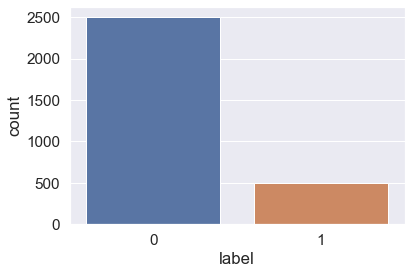

In [127]:
#visualising distribution; imbalanced classes
import warnings
warnings.filterwarnings('ignore')

sn.countplot(df_emails['label'])


In [128]:
# Divide the data into training and test set using sklearn's train_test_split.
# use the colunm 'email' for the training data
# use the column 'label' as the target y

X_train, X_test, y_train, y_test = train_test_split(email, label, test_size = 0.3, random_state = 42)

print("Training size is: ", len(X_train))
print("Test size is: ", len(X_test))


Training size is:  2100
Test size is:  900


We are going to use some NLP-specific methods here. Machine Learning Models are expecting numerical values as their input.

Therefore, we must process the text a bit - transforming every word to some fraction, based on their frequency.   
This score represents how unique the word is, based on their appearance count in the whole dataset.

We will use a [Naive Bayes, assuming a Multinomial distribution](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html), and put it in a data processing [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

In [129]:
# Create Pre-processing pipeline and a Multinomial Naive Bayes classifier.

# CountVectorizer calculates the frequency of words in the dataset (how often they appear)
# TfidfTransformer calculates the frequency of a word in this document, divided by their frequency over ALL the documents.


# MultinomialNB is a Naive Bayes classifier assuming a multinomial distribution
spam_classifier_pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words="english", lowercase=True)),
    ('tfidf', TfidfTransformer(use_idf=True, smooth_idf=True)),
    ('clf', MultinomialNB(alpha=1)),
])

And we train:

In [130]:
spam_classifier_pipeline.fit(X_train.values.astype('U'), y_train)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=1))])

Now that we have a classifier - let's filter some spam!!!

In [131]:
y_preds = spam_classifier_pipeline.predict(X_test.values.astype('U'))

In [132]:
print(metrics.classification_report(y_test, y_preds, target_names=["Spam","Not Spam"]))

              precision    recall  f1-score   support

        Spam       0.88      1.00      0.93       745
    Not Spam       1.00      0.32      0.48       155

    accuracy                           0.88       900
   macro avg       0.94      0.66      0.71       900
weighted avg       0.90      0.88      0.86       900



Pay attention to the results. Our dataset is not balanced, hence we have large differences between the different f1-scores.

If we plot a confusion table, we can clearly see that we didn't do so well, despite the high f1-score:

<AxesSubplot:>

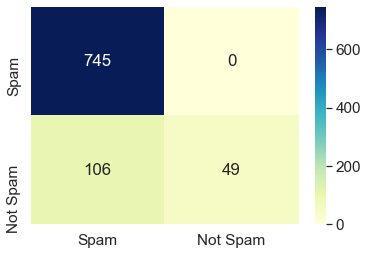

In [133]:
conf_mat = metrics.confusion_matrix(y_test, y_preds)
df_cm = pd.DataFrame(conf_mat, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")


Comment for me:  106 non spam emails are classified as spam. 0 spam emails incorrectly classified as not spam. 

This is one of the reasons that the [Mathew's Correlation Coefficients](https://www.statisticshowto.com/matthews-correlation-coefficient/) is such a good alternative to the F1-Score:

In [134]:
print(metrics.matthews_corrcoef(y_test, y_preds)) 
#very bad score 

0.5260724361041028


# Can we do better?

Let's try it again - this time with another inductive bias - we will assume the distribution of the text is of [`ComplementNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html#sklearn.naive_bayes.ComplementNB)

---
## Your turn:

Create a pipeline with a [Complement Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html#complement-naive-bayes), which fits better imbalanced classes, and train it on our dataset.

Check your results on the test-set and plot a confussion matrix.

How did your new model do?

In [148]:
spam_classifier_pipe = Pipeline([
    ('vect', CountVectorizer(stop_words="english", lowercase=True)),
    ('tfidf', TfidfTransformer(use_idf=True, smooth_idf=True)),
    ('clf', ComplementNB(alpha=0.3)),
])

In [149]:
spam_classifier_pipe.fit(X_train.values.astype('U'), y_train)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', ComplementNB(alpha=0.3))])

In [150]:
y_preds = spam_classifier_pipe.predict(X_test.values.astype('U'))

In [151]:
print(metrics.classification_report(y_test, y_preds, target_names=["Spam","Not Spam"]))

              precision    recall  f1-score   support

        Spam       0.97      1.00      0.99       745
    Not Spam       1.00      0.86      0.93       155

    accuracy                           0.98       900
   macro avg       0.99      0.93      0.96       900
weighted avg       0.98      0.98      0.98       900



<AxesSubplot:>

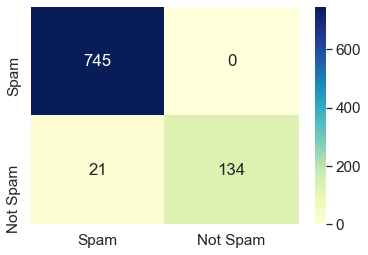

In [152]:
conf_mat = metrics.confusion_matrix(y_test, y_preds)
df_cm = pd.DataFrame(conf_mat, ["Spam","Not Spam"], ["Spam","Not Spam"])

sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")

In [153]:
print(metrics.matthews_corrcoef(y_test, y_preds)) #not bad 

0.916959811119121


## Bonus: Try another model

Try comparing your achieved results with another model (kNN, Decision Tree, Random Forest). Hint: you'll need to still use the TFIDF.

Which model yield the best results?

# kNN model with grid search

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [155]:
spam_classifier_knn = Pipeline([('vect', CountVectorizer(stop_words = "english", lowercase = True)), 
                                ('tfidf', TfidfTransformer(use_idf = True, smooth_idf = True)), 
                                ('knn', KNeighborsClassifier()),
                               ])

In [156]:
parameters = {'knn__n_neighbors': [3, 5, 7, 9, 11, 13], 'knn__metric': ['euclidean','manhattan']}

grid_search = GridSearchCV(spam_classifier_knn, parameters, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train.values.astype('U'), y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 9}
Best cross-validated score: 0.9623809523809523


In [157]:
spam_classifier_knn_best = grid_search.best_estimator_
spam_classifier_knn_best.fit(X_train.values.astype('U'), y_train)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=9))])

In [158]:
y_preds_3 = spam_classifier_knn_best.predict(X_test.values.astype('U'))

              precision    recall  f1-score   support

        Spam       0.97      0.97      0.97       745
    Not Spam       0.85      0.86      0.85       155

    accuracy                           0.95       900
   macro avg       0.91      0.91      0.91       900
weighted avg       0.95      0.95      0.95       900



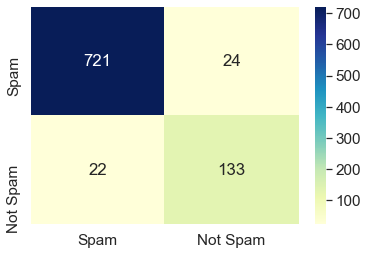

Matthews Correlation Coefficient: 0.8216763642816645


In [159]:

print(metrics.classification_report(y_test, y_preds_3, target_names=["Spam", "Not Spam"]))

conf_mat = metrics.confusion_matrix(y_test, y_preds_3)
df_cm = pd.DataFrame(conf_mat, ["Spam", "Not Spam"], ["Spam", "Not Spam"])


sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

print("Matthews Correlation Coefficient:", metrics.matthews_corrcoef(y_test, y_preds_3))

# # I am not a big fan of decision trees! I dont like them because of the final results

In [160]:
from sklearn.tree import DecisionTreeClassifier

In [161]:
spam_classifier_pipe_dt = Pipeline([
    ('vect', CountVectorizer(stop_words="english", lowercase=True)),
    ('tfidf', TfidfTransformer(use_idf=True, smooth_idf=True)),
    ('dt', DecisionTreeClassifier(class_weight='balanced', max_depth = 19, criterion = "entropy", max_features = 9, min_samples_leaf = 3, min_samples_split = 25, random_state=42))
])


In [162]:
spam_classifier_pipe_dt.fit(X_train.values.astype('U'), y_train)

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('dt',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='entropy', max_depth=19,
                                        max_features=9, min_samples_leaf=3,
                                        min_samples_split=25,
                                        random_state=42))])

In [163]:
y_preds_4 = spam_classifier_pipe_dt.predict(X_test.values.astype('U'))

              precision    recall  f1-score   support

        Spam       0.84      0.98      0.91       745
    Not Spam       0.55      0.14      0.22       155

    accuracy                           0.83       900
   macro avg       0.70      0.56      0.56       900
weighted avg       0.79      0.83      0.79       900



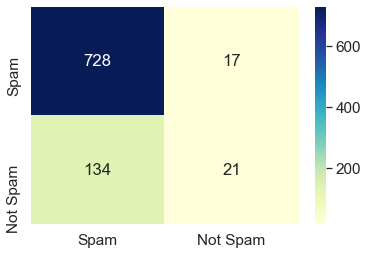

Matthews Correlation Coefficient: 0.2115377495953676


In [164]:

print(metrics.classification_report(y_test, y_preds_4, target_names=["Spam", "Not Spam"]))

conf_mat = metrics.confusion_matrix(y_test, y_preds_4)
df_cm = pd.DataFrame(conf_mat, ["Spam", "Not Spam"], ["Spam", "Not Spam"])


sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
plt.show()


print("Matthews Correlation Coefficient:", metrics.matthews_corrcoef(y_test, y_preds_4))
#this coefficient was soo bad

# # My attempt to apply grid search...this is where I found the best parameters

In [71]:
parameters_dt = {"dt__max_depth": [5, 9, 15, 19],
              "dt__max_features": [5, 9, 13],
              "dt__min_samples_leaf": [3, 6],
              "dt__min_samples_split": [ 20, 25],
              "dt__criterion": ["gini", "entropy"]}
grid_search_2 = GridSearchCV(spam_classifier_pipe_dt, parameters_dt, cv=5, scoring='accuracy', verbose=1)

grid_search_2.fit(X_train, y_train)

print("Best parameters:", grid_search_2.best_params_)
print("Best cross-validated score:", grid_search_2.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best parameters: {'dt__criterion': 'entropy', 'dt__max_depth': 19, 'dt__max_features': 9, 'dt__min_samples_leaf': 3, 'dt__min_samples_split': 25}
Best cross-validated score: 0.8509523809523809


In [72]:
spam_classifier_dt_best = grid_search_2.best_estimator_

spam_classifier_dt_best.fit(X_train.values.astype('U'), y_train)



Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('dt',
                 DecisionTreeClassifier(criterion='entropy', max_depth=19,
                                        max_features=9, min_samples_leaf=3,
                                        min_samples_split=25,
                                        random_state=42))])

In [73]:
y_preds_4 = spam_classifier_dt_best.predict(X_test.values.astype('U'))

              precision    recall  f1-score   support

        Spam       0.83      1.00      0.91       751
    Not Spam       0.00      0.00      0.00       149

    accuracy                           0.83       900
   macro avg       0.42      0.50      0.45       900
weighted avg       0.70      0.83      0.76       900



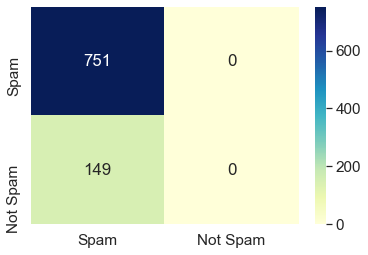

Matthews Correlation Coefficient: 0.0


In [74]:
print(metrics.classification_report(y_test, y_preds_4, target_names=["Spam", "Not Spam"]))

conf_mat = metrics.confusion_matrix(y_test, y_preds_4)
df_cm = pd.DataFrame(conf_mat, ["Spam", "Not Spam"], ["Spam", "Not Spam"])


sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

print("Matthews Correlation Coefficient:", metrics.matthews_corrcoef(y_test, y_preds_4))
#this coefficient was sooo bad 